In [13]:
# 导包
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [14]:
# 数据预处理
train_data = pd.read_csv('work2/train.csv')
train_data = train_data.loc[:, ~train_data.columns.str.contains("^Unnamed")]

col = train_data.columns
remove = ['category', 'description', 'ein', 'leader', 'motto', 'name', 'state', 'subcategory', 'size']
keys = []
for i in col:
    if i not in remove:
        keys.append(i)
train_data = train_data[keys]

for k in keys:
    train_data[k] = pd.to_numeric(train_data[k], errors='coerce')


train_data = train_data.dropna()        # 清洗NaN

train_data

,ascore,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,leader_comp,leader_comp_p,tot_rev,score,program_exp,fund_exp,admin_exp
0,100,917313.0,0.101,0.18,0.184,0.714,88.61,0.0,0.0000,1022513.0,91.94,6.549615e+05,168785.592,92648.613
1,89,5053059.0,0.231,0.05,0.032,0.735,82.85,163341.0,0.0323,5685761.0,85.59,3.713998e+06,161697.888,1167256.629
2,70,1891500.0,0.114,0.17,0.197,0.687,86.74,114791.0,0.0606,2140836.0,76.80,1.299460e+06,372625.500,215631.000
3,93,22506582.0,0.092,0.08,0.054,0.852,91.03,124805.0,0.0055,22203175.0,91.95,1.917561e+07,1215355.428,2070605.544
4,100,5594243.0,0.126,0.12,0.122,0.750,86.23,219002.0,0.0391,6935506.0,90.26,4.195682e+06,682497.646,704874.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394,100,24642028.0,0.014,0.02,0.028,0.957,91.63,108269.0,0.0043,25063245.0,94.08,2.358242e+07,689976.784,344988.392
7395,100,47475099.0,0.013,0.02,0.027,0.959,82.80,0.0,0.0000,47715473.0,87.83,4.552862e+07,1281827.673,617176.287
7397,100,47886362.0,0.008,0.01,0.010,0.980,89.72,137344.0,0.0028,47579889.0,92.73,4.692863e+07,478863.620,383090.896
7398,100,33000454.0,0.021,0.02,0.021,0.957,80.44,98448.0,0.0029,33963612.0,86.16,3.158143e+07,693009.534,693009.534


In [15]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7004 entries, 0 to 7399
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         7004 non-null   int64  
 1   tot_exp        7004 non-null   float64
 2   admin_exp_p    7004 non-null   float64
 3   fund_eff       7004 non-null   float64
 4   fund_exp_p     7004 non-null   float64
 5   program_exp_p  7004 non-null   float64
 6   fscore         7004 non-null   float64
 7   leader_comp    7004 non-null   float64
 8   leader_comp_p  7004 non-null   float64
 9   tot_rev        7004 non-null   float64
 10  score          7004 non-null   float64
 11  program_exp    7004 non-null   float64
 12  fund_exp       7004 non-null   float64
 13  admin_exp      7004 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 820.8 KB


In [16]:
# 提取目标值 score
target_data = train_data.iloc[:, 10:11]
print(target_data)
y_data = np.array(target_data)
y_data

      score
0     91.94
1     85.59
2     76.80
3     91.95
4     90.26
...     ...
7394  94.08
7395  87.83
7397  92.73
7398  86.16
7399  91.65

[7004 rows x 1 columns]


array([[91.94],
       [85.59],
       [76.8 ],
       ...,
       [92.73],
       [86.16],
       [91.65]])

In [17]:
x_data_col = [i for i in train_data.columns if i not in ['score']]
x_data = train_data[x_data_col]

# 提取特征名称
feature_name = x_data.columns
feature_name = feature_name[0:]
feature_name = np.array(feature_name)
feature_name

x_data = np.array(x_data)
x_data

from sklearn.preprocessing import StandardScaler        # 标准化
scalar = StandardScaler()

train_data = np.array(train_data)
x_array = scalar.fit_transform(x_data)
x_array

array([[ 0.96111665, -0.2081017 , -0.07391844, ..., -0.20062378,
        -0.16723311, -0.23493459],
       [-0.2632467 , -0.14638688,  2.0116113 , ..., -0.14965111,
        -0.16874849, -0.00581643],
       [-2.37805613, -0.1935646 ,  0.13463454, ..., -0.1898845 ,
        -0.12365139, -0.20871341],
       ...,
       [ 0.96111665,  0.49278432, -1.56587432, ...,  0.57043356,
        -0.10093729, -0.17300913],
       [ 0.96111665,  0.2706524 , -1.35732135, ...,  0.31470345,
        -0.0551521 , -0.10693109],
       [ 0.51589361,  0.66651732, -1.53378925, ...,  0.75063325,
         0.03850227, -0.12776623]])

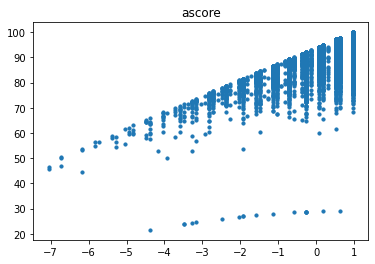

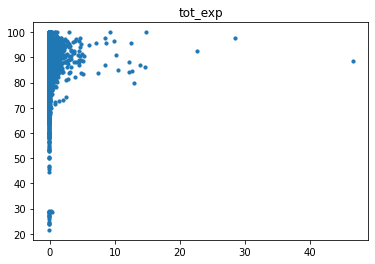

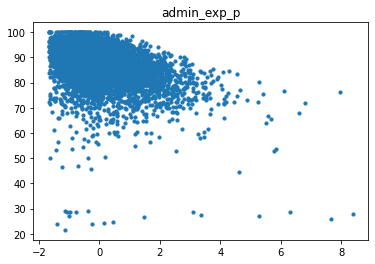

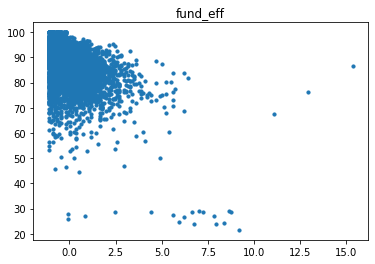

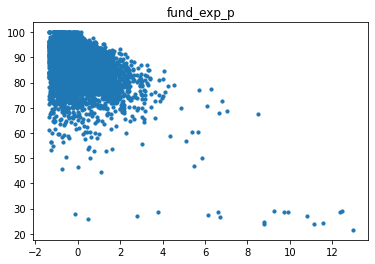

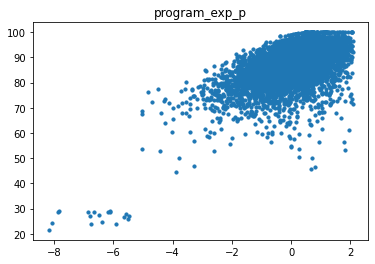

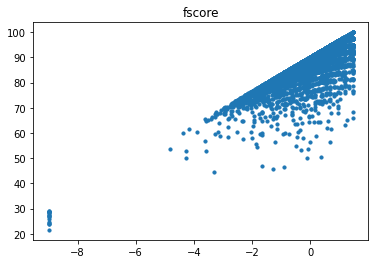

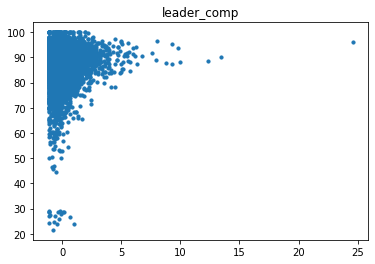

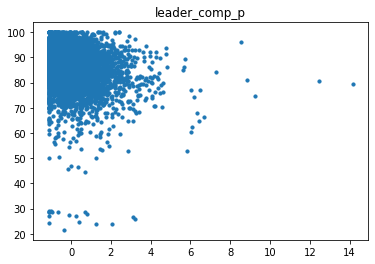

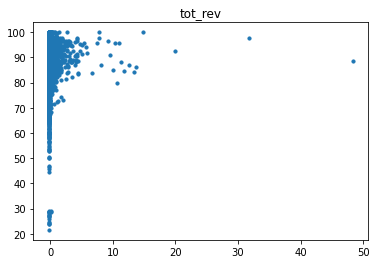

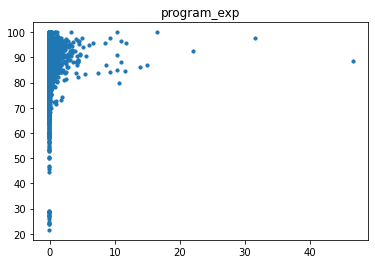

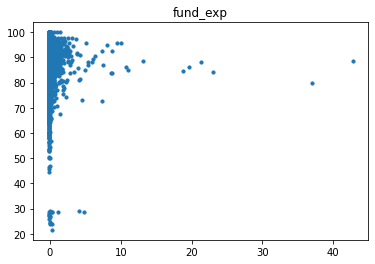

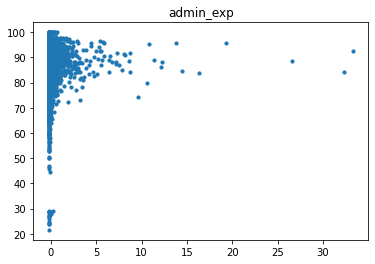

In [18]:
for i in range(13):
    plt.scatter(x_array[:, i], y_data, s=10)
    plt.title(feature_name[i])
    plt.show()

In [7]:
# 根据以上各个特征值与目标值scroe形成各自的散点图 
# 经过分析 可知 ascore admin_exp_p  program_exp_p  fscore
# 四个主要特征于慈善机构的评分相关性最大  因此 剔除其余不相关特征

In [19]:
# 剔除不相关特征
temp = []

for i in range(13):
    if feature_name[i]=='ascore' or feature_name[i]=='program_exp_p' or feature_name[i]=='fscore' or feature_name[i]=='admin_exp_p':
        continue;
    temp.append(i)

train_data = np.delete(train_data, temp, axis=1)

x_data = train_data.astype(np.float)
x_data

array([[1.00000000e+02, 1.01000000e-01, 7.14000000e-01, 8.86100000e+01,
        9.26486130e+04],
       [8.90000000e+01, 2.31000000e-01, 7.35000000e-01, 8.28500000e+01,
        1.16725663e+06],
       [7.00000000e+01, 1.14000000e-01, 6.87000000e-01, 8.67400000e+01,
        2.15631000e+05],
       ...,
       [1.00000000e+02, 8.00000000e-03, 9.80000000e-01, 8.97200000e+01,
        3.83090896e+05],
       [1.00000000e+02, 2.10000000e-02, 9.57000000e-01, 8.04400000e+01,
        6.93009534e+05],
       [9.60000000e+01, 1.00000000e-02, 9.70000000e-01, 8.88900000e+01,
        5.95288740e+05]])

In [20]:
# 模型训练
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=0, test_size=0.35)

In [21]:
# 回归模型评估
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr_y_predict = lr.predict(x_test)

mean_squared_error(y_test, lr_y_predict)

1.848318115638186

In [22]:
# 岭回归
rr = linear_model.Ridge()
rr.fit(x_train, y_train)
rr_y_predict = rr.predict(x_test)

mean_squared_error(y_test, rr_y_predict)

D:\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0315e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


1.8475503460701934

In [23]:
# Lasso
lassor = linear_model.Lasso(alpha=.00001)
lassor.fit(x_train, y_train)
lassor_y_predict = lassor.predict(x_test)

mean_squared_error(y_test, lassor_y_predict)

1.8482900504400654

In [25]:
# SVR
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train.ravel())
predict_svr = svr.predict(x_test)
mean_squared_error(predict_svr, y_test)

62.09418008786442

In [26]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train.ravel())
predict_rfr = rfr.predict(x_test)
mean_squared_error(y_test, predict_rfr)

0.12110564258156573

In [27]:
# 梯度提升
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train.ravel())
predict_gbr = gbr.predict(x_test)
mean_squared_error(y_test, predict_gbr)

0.09239982635822665

In [29]:
# 预测数据
test_data = pd.read_csv('data/test.csv')
test_data = test_data.drop(columns=['category', 'description', 'ein', 'leader', 'motto', 'name', 'state', 'subcategory', 'size'])
test_data

,ascore,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,leader_comp,leader_comp_p,tot_rev,program_exp,fund_exp,admin_exp
0,97,2826138224,0.003,0.01,0.009,0.986,92.50,806288.0,0.0002,2827633478,2.786572e+09,2.543524e+07,8.478415e+06
1,85,1652817,0.078,0.06,0.064,0.856,84.38,60937.0,0.0368,1756065,1.414811e+06,1.057803e+05,1.289197e+05
2,97,426200732,0.025,0.04,0.043,0.931,92.68,502805.0,0.0011,409829103,3.967929e+08,1.832663e+07,1.065502e+07
3,100,39826949,0.067,0.07,0.074,0.857,88.47,229365.0,0.0057,41985008,3.413170e+07,2.947194e+06,2.668406e+06
4,100,5751235,0.053,0.01,0.014,0.932,95.00,89606.0,0.0155,5662565,5.360151e+06,8.051729e+04,3.048155e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,92,3283832,0.231,0.22,0.196,0.572,71.94,289028.0,0.0880,3296070,1.878352e+06,6.436311e+05,7.585652e+05
996,59,1387396,0.147,0.27,0.285,0.567,60.71,NaN,NaN,1446929,7.866535e+05,3.954079e+05,2.039472e+05
997,100,2419474,0.061,0.04,0.052,0.885,83.13,130000.0,0.0537,2442069,2.141234e+06,1.258126e+05,1.475879e+05
998,100,14606304,0.128,0.12,0.073,0.797,95.64,129314.0,0.0088,12608419,1.164122e+07,1.066260e+06,1.869607e+06


In [30]:
# 提取测试集特征名

name = test_data.columns
name = np.array(name)
name

array(['ascore', 'tot_exp', 'admin_exp_p', 'fund_eff', 'fund_exp_p',
       'program_exp_p', 'fscore', 'leader_comp', 'leader_comp_p',
       'tot_rev', 'program_exp', 'fund_exp', 'admin_exp'], dtype=object)

In [32]:
# 剔除不相关特征数据
temp_ = []

for i in range(13):
    if name[i]=='ascore' or name[i]=='program_exp_p' or name[i]=='fscore' or name[i]=='admin_exp_p':
        continue;
    temp_.append(i)

test_x = np.array(test_data)
test_x = np.delete(test_x, temp_, axis=1)
test_x = test_x.astype(np.float)
test_x

array([[9.700e+01, 3.000e-03, 9.860e-01, 9.250e+01],
       [8.500e+01, 7.800e-02, 8.560e-01, 8.438e+01],
       [9.700e+01, 2.500e-02, 9.310e-01, 9.268e+01],
       ...,
       [1.000e+02, 6.100e-02, 8.850e-01, 8.313e+01],
       [1.000e+02, 1.280e-01, 7.970e-01, 9.564e+01],
       [1.000e+02, 1.480e-01, 8.050e-01, 8.910e+01]])

In [33]:
# 模型参数调优
# 随机搜索调参
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
'learning_rate': np.linspace(0.01, 0.02, 10),
'subsample': np.linspace(0.4, 0.6, 10),
}

search = RandomizedSearchCV(GradientBoostingRegressor(), param_dist, 
cv = 3, scoring = 'neg_mean_squared_error', n_iter=100, n_jobs = -1)
search.fit(x_data, y_data.ravel())
search.best_params_

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

In [ ]:
# 根据测试集预测score结果
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=4, n_estimators=3460, subsample=0.53, learning_rate=0.02)
gbr.fit(x_data, y_data.ravel())
predict_gbr = gbr.predict(test_x)

In [ ]:
# 将预测结果写入csv文件
origin_data = pd.read_csv('/data/test.csv')
result = pd.concat([origin_data, pd.DataFrame(predict_gbr)], axis=1)
result.to_csv('./work2/predict.csv')